# Malicious Server Hack: Data Science

Problem Description: 

All the countries across the globe have adapted to means of digital payments and with the increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your phone number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.


Column	Description:
INCIDENT_ID 	Unique identifier for an incident log
DATE	        Date of incident occurence
X1 - X15	    Anonymized logging parameters
MALICIOUS_OFFENSE	[Target] Indicates if the incident was a hack [1: Yes; 0:No]






Importing the libraries to access the functions 

In [1]:
#import libraries
import numpy as np
import pandas as pd
# matplotlib and seabron for visualization
import matplotlib.pyplot as plt 


Phase One of Data Analysis Using Python (Data Preparation) At this point, we are preparing the data in a manner that suits the analysis process, and this is an important step before implementing the analysis, even when applying machine learning or artificial intelligence algorithms to the data. After preparing the data, I clean the data by using the steps in the below to do exploratory data analysis:

1-Remove the column Date, as we don't need it. 
2- Verify if there are null values in the data.
3-Add a new Features.


In [2]:
Malicious_Server= pd.read_csv("Train.csv") # Read data into a dataframe


In [3]:
Malicious_Server.head()# Display top 5 of dataframe



,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


Clean Up the data

1- Argument data with additional columns

In [4]:
Malicious_Server['DATE'] = pd.to_datetime(Malicious_Server['DATE'])

In [5]:
#extract year & month & day from Datetime [DATE]

Malicious_Server['year'] = pd.DatetimeIndex(Malicious_Server['DATE']).year
Malicious_Server['month'] = pd.DatetimeIndex(Malicious_Server['DATE']).month 


In [6]:
Malicious_Server['week_name'] = Malicious_Server['DATE'].dt.day_name()


2-Remove the column Date, as we don't need it. 

In [7]:
Malicious_Server.drop(['DATE'],axis=1,inplace=True) # Delete DATE column


In [8]:
Malicious_Server.head()# Display top of dataframe after delete [DATE]

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE,year,month,week_name
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,2004,7,Sunday
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,2017,7,Tuesday
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2017,3,Wednesday
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2009,2,Friday
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2005,4,Wednesday


In [9]:
Malicious_Server.shape #Get number of rows and columns

(23856, 20)

3- Verify if there are null values in the data and remove them.

In [10]:
Malicious_Server.isnull().sum() #Count number of missing vaules in each columns


INCIDENT_ID            0
X_1                    0
X_2                    0
X_3                    0
X_4                    0
X_5                    0
X_6                    0
X_7                    0
X_8                    0
X_9                    0
X_10                   0
X_11                   0
X_12                 182
X_13                   0
X_14                   0
X_15                   0
MALICIOUS_OFFENSE      0
year                   0
month                  0
week_name              0
dtype: int64

In [11]:
Malicious_Server.dropna(subset = ['X_12'], how = 'all').shape #Drop all missing values from column X_12 and display shape of columns and row

(23674, 20)

In [12]:
Malicious_Server.isna().all() #We should check if a null value still exist or not


INCIDENT_ID          False
X_1                  False
X_2                  False
X_3                  False
X_4                  False
X_5                  False
X_6                  False
X_7                  False
X_8                  False
X_9                  False
X_10                 False
X_11                 False
X_12                 False
X_13                 False
X_14                 False
X_15                 False
MALICIOUS_OFFENSE    False
year                 False
month                False
week_name            False
dtype: bool

Exploratory Data Analysis:

Exploratory Data Analysis (EDA) is a process that involves asking a question, reviewing the data, and developing further question before beginning design work on a model. 
During the data exploration stage, we try to obtain formal or preliminary information about the data, and this information is often information about the middle character numbers, the median, the maximum and minimum values for each characteristic.

We are lucky to have the wonderful Panda library, which provides several functions that assist us to analysis! 


After I fetch the data, I determine a set of questions that represent the 'problem'. The answer to these questions will be through the analysis process.

The questions are as follows:

1-How many hacks are there ?

2-Which month has the most penetration?

3-How many times has the anonymous recording?

4-How long has there been no penetration of server? 


In [13]:
anon = Malicious_Server[Malicious_Server.columns[1:-4]]#Determine anonymous parameter 

In [14]:
anon.describe() #Show statistical information about the columns

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000


In [15]:
#3-How many times has the anonymous recording?

Malicious_Server[Malicious_Server['X_11'] == 332] #x_11 contains the highest number of an anonymous access


,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE,year,month,week_name
8408,CR_171217,0,37,37,0,0,2,7,1,5,1,332,1.0,103,87,34,1,2014,3,Monday
12692,CR_126403,0,46,46,3,5,6,4,1,6,1,332,1.0,116,107,34,1,2007,3,Thursday
20544,CR_162163,0,6,6,4,1,4,2,1,6,1,332,0.0,8,62,23,1,2013,11,Sunday


In [16]:
Malicious_Server[Malicious_Server['X_11'] == 332] #x_11 contains the highest number of an anonymous access




,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE,year,month,week_name
8408,CR_171217,0,37,37,0,0,2,7,1,5,1,332,1.0,103,87,34,1,2014,3,Monday
12692,CR_126403,0,46,46,3,5,6,4,1,6,1,332,1.0,116,107,34,1,2007,3,Thursday
20544,CR_162163,0,6,6,4,1,4,2,1,6,1,332,0.0,8,62,23,1,2013,11,Sunday


In [17]:
Malicious_Server['MALICIOUS_OFFENSE'].value_counts() # count how many times happen the penitration 

1    22788
0     1068
Name: MALICIOUS_OFFENSE, dtype: int64

In [18]:
#1-How many hacks are there ?


MALICIOUS_per_years= Malicious_Server[['year', 'MALICIOUS_OFFENSE']][Malicious_Server['MALICIOUS_OFFENSE']==1].groupby('year').count()
MALICIOUS_per_years #total of hacking per years  

,MALICIOUS_OFFENSE
year,
1991,497
1992,771
1993,932
1994,698
1995,788
1996,974
1997,895
1998,892
1999,831


<AxesSubplot:xlabel='year'>

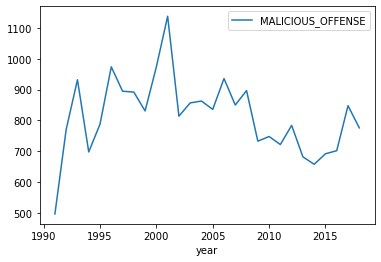

In [19]:
Malicious_Server[['year', 'MALICIOUS_OFFENSE']][Malicious_Server['MALICIOUS_OFFENSE']==1].groupby('year').count().plot()

Based on the results, the most hacks occurred in 2001

In [20]:
Malicious_Server[['year', 'MALICIOUS_OFFENSE']][Malicious_Server['MALICIOUS_OFFENSE']==0].groupby('year').count()

,MALICIOUS_OFFENSE
year,
1991,15
1992,21
1993,30
1994,26
1995,50
1996,66
1997,57
1998,55
1999,34


In the figure below, the most attacks occurred in May.

<AxesSubplot:xlabel='month'>

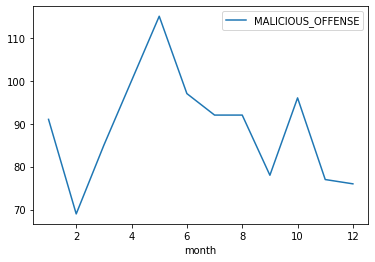

In [21]:
#Q2: Which month has the most penetration?
Malicious_Server[['month', 'MALICIOUS_OFFENSE']][Malicious_Server['MALICIOUS_OFFENSE']==0].groupby('month').count().plot()


In the figure below, the most attacks occurred in Sunday.

<AxesSubplot:xlabel='week_name'>

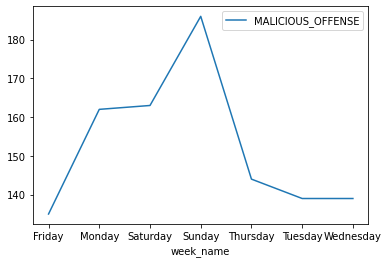

In [22]:
Malicious_Server[['week_name', 'MALICIOUS_OFFENSE']][Malicious_Server['MALICIOUS_OFFENSE']==0].groupby('week_name').count().plot()


In [23]:
sum_by_month =Malicious_Server.groupby('month')[['INCIDENT_ID','X_11']].agg([sum]).sort_values(by=('INCIDENT_ID','sum'))
sum_by_month
#How many accidents and anonymous logins occur each month?



,INCIDENT_ID,X_11
,sum,sum
month,,
7,CR_102659CR_189752CR_148441CR_99283CR_187216CR...,439030
11,CR_106537CR_13905CR_111975CR_109842CR_110879CR...,385866
4,CR_109335CR_96263CR_31901CR_92787CR_193653CR_1...,439497
10,CR_11185CR_115118CR_31819CR_163234CR_26119CR_2...,447528
5,CR_11981CR_73049CR_139996CR_173928CR_9159CR_21...,442376
6,CR_124930CR_136415CR_146067CR_163348CR_31500CR...,435274
1,CR_131400CR_192564CR_131018CR_8305CR_149320CR_...,352923
2,CR_139071CR_64799CR_57991CR_125510CR_96422CR_3...,359162


In conclusion, I noticed that most of penetration and anonymous logins occur on Sunday throughout all the years.